## IRIS CLASSIFICATION


## Introduction

This project focuses on the classification of the Iris dataset, one of the most well-known datasets in the field of machine learning. The Iris dataset contains measurements of sepal length, sepal width, petal length, and petal width for three species of Iris flowers: Setosa, Versicolor, and Virginica. The goal of this project is to build various machine learning models to classify the species of a flower based on its features.

## Objectives

1. Perform exploratory data analysis (EDA) to understand the dataset.
2. Preprocess the data to make it suitable for machine learning models.
3. Train and evaluate multiple machine learning models, such as:
    - Logistic Regression
    - Decision Trees
    - Random Forest
    - Support Vector Machines (SVM)
    - K-Nearest Neighbors (KNN)
4. Compare the performance of these models to identify the best-performing one.
5. Implement a live interactive dashboard using Streamlit to allow users to input flower measurements and predict the species in real-time.

This project will demonstrate the end-to-end process of building a machine learning application, from data analysis to deployment.

In [123]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_curve, PrecisionRecallDisplay, precision_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [124]:
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [125]:
data = pd.DataFrame(data=iris.data,columns=iris.feature_names)
col = iris.feature_names
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\apoor\AppData\Local\Temp\ipykernel_27444\3748782141.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


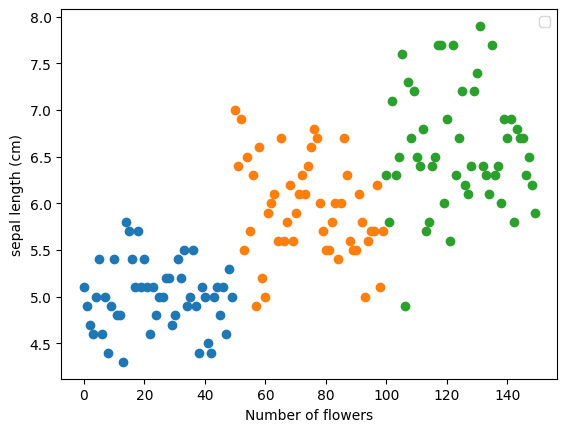

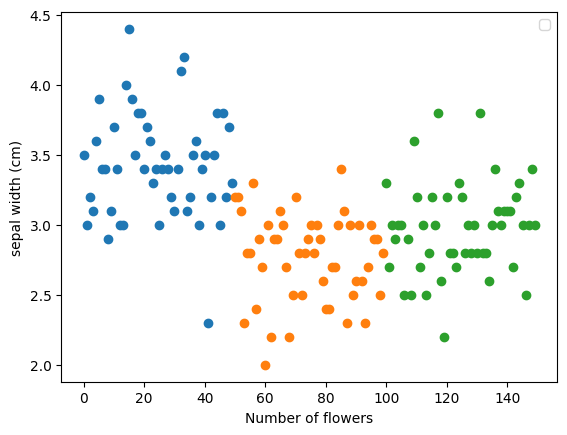

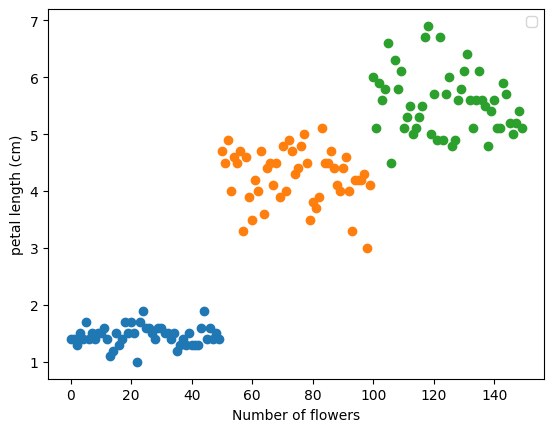

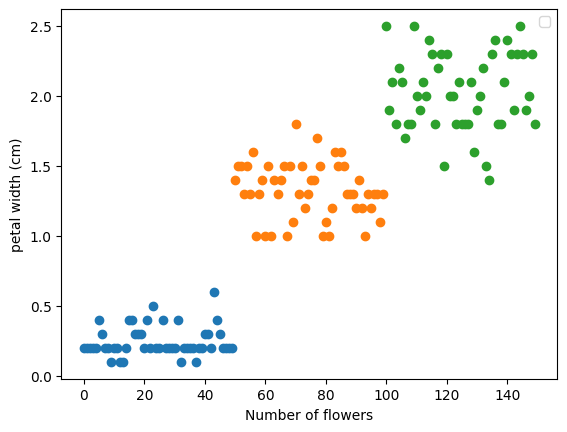

In [126]:
for labels in col:
    plt.scatter(data[data['species']=='setosa'].index, data[data['species']=='setosa'][labels])
    plt.scatter(data[data['species']=='versicolor'].index, data[data['species']=='versicolor'][labels])
    plt.scatter(data[data['species']=='virginica'].index, data[data['species']=='virginica'][labels])    
    plt.legend()
    plt.xlabel('Number of flowers')
    plt.ylabel(f'{labels}')
    plt.show()

In [127]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [128]:
train, valid, test = np.split(data.sample(frac=1), [int(0.6*len(data)),int(0.8*len(data))])
print(train.shape)
print(valid.shape)
print(test.shape)

(90, 5)
(30, 5)
(30, 5)


C:\Users\apoor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [129]:
print(train[train['species']=="setosa"].shape)
print(train[train['species']=="versicolor"].shape)
print(train[train['species']=="virginica"].shape)

(32, 5)
(31, 5)
(27, 5)


## Scaling Data
Scaling of the database is very important as sometimes the distribution of the values of different features can have different ranges which can lead to one feature influence the model and create biases. Scaling destributes the database to a common scale and prevents the influence of a particular or a group of features in the model. Scaling is very crutial when it comes to distance based Machine Learning algorithms like N-nearest and SVM's. 

In [130]:
def scale_data(data, overfitting = False):
   x = data[data.columns[0:-1]]
   y = data[data.columns[-1]]
   scale = StandardScaler()
   x = scale.fit_transform(x)
   if overfitting:
      ros = RandomOverSampler()
      x,y = ros.fit_resample(x,y)
   data_scaled = np.hstack((x, np.reshape(y,(-1,1))))
   
   return data_scaled, x, y

In [131]:
train, x_train, y_train = scale_data(train, overfitting=True)
valid, x_valid, y_valid = scale_data(valid, overfitting=False)
test, x_test, y_test = scale_data(test, overfitting=False)

### Defining Functions to calculate the precision and recall values manually and then plotting those values

In [132]:
def calculate_values(i,cm):
    tp = fp = fn = fp_sum = fn_sum = 0
    tp  = cm[i,i]
    for j in range(len(cm)):
          fp_sum = fp_sum + cm[i,j]
    for k in range(len(cm)):
          fn_sum = fn_sum + cm[k,i]
    fp = fp_sum - tp
    fn = fn_sum - tp
    
    precision = float(tp/(tp+fp))
    recall = float(tp/(tp+fn))
    return [i,precision,recall]

In [133]:
def matrix(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    final = []
    for i in range(len(cm)):
       vals = calculate_values(i,cm)
       final.append(vals)

    return np.array(final)

In [134]:
def plot_pc(precision_recall_matrix):
    for i in range(len(precision_recall_matrix)):
        precision = precision_recall_matrix[i,1]
        recall = precision_recall_matrix[i,2]
        if(i==0):
            cls = "Setosa"
        if(i==1):
            cls = "Versicolor"
        if(i==2):
            cls = "Virginica"
        plt.scatter(precision,recall, label = f'{cls}')
        plt.legend()
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.xlim(0, 1.5)
        plt.ylim(0, 1.5)
        plt.grid(True)

## Logistic Regression
This section uses Logistic Regression for identifying the species.

In [135]:
lg = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=200)
lg.fit(x_train,y_train)

score_croos_valid = cross_val_score(lg, x_valid, y_valid, cv=5)
print(score_croos_valid)
print("Cross Validation Score = "+f'{score_croos_valid.mean()}')

[0.83333333 0.83333333 0.83333333 1.         0.83333333]
Cross Validation Score = 0.8666666666666666


C:\Users\apoor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\apoor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\apoor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

In [136]:
y_pred = lg.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(y_pred)
print("Accuracy Score of Logistic Regression = "+f'{score}')

['versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor'
 'virginica' 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']
Accuracy Score of Logistic Regression = 0.8333333333333334


[[0.         1.         1.        ]
 [1.         1.         0.66666667]
 [2.         0.61538462 1.        ]]


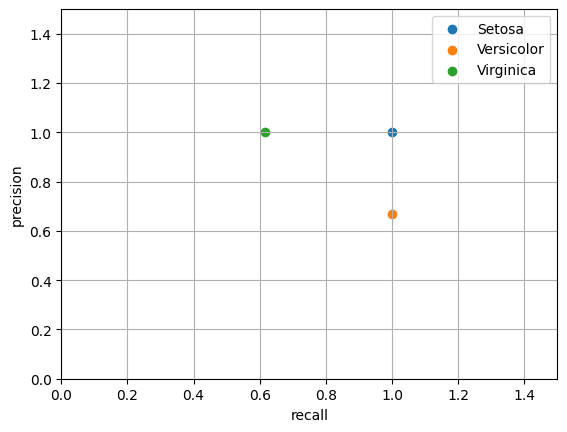

In [137]:
precision_recall_matrix = matrix(y_test,y_pred)
print(precision_recall_matrix)
plot_pc(precision_recall_matrix)

## Decision Trees
This section uses Decision Trees for identifying the species.

In [138]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
score = accuracy_score(y_test,y_pred)

print(y_pred)
print("Accuracy Score of Descision trees = "+f'{score}')

['versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor'
 'virginica' 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']
Accuracy Score of Descision trees = 0.8333333333333334


[[0.         1.         1.        ]
 [1.         1.         0.66666667]
 [2.         0.61538462 1.        ]]


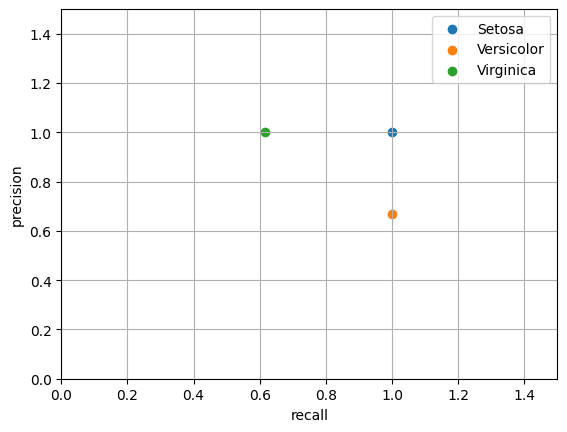

In [139]:
precision_recall_matrix = matrix(y_test,y_pred)
print(precision_recall_matrix)
plot_pc(precision_recall_matrix)

In [140]:
export_tree = export_text(dtc, feature_names=iris.feature_names)
print(export_tree)

|--- petal width (cm) <= -0.53
|   |--- class: setosa
|--- petal width (cm) >  -0.53
|   |--- petal width (cm) <= 0.78
|   |   |--- sepal width (cm) <= -1.87
|   |   |   |--- petal width (cm) <= 0.12
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal width (cm) >  0.12
|   |   |   |   |--- class: virginica
|   |   |--- sepal width (cm) >  -1.87
|   |   |   |--- sepal length (cm) <= -1.04
|   |   |   |   |--- petal length (cm) <= 0.13
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- petal length (cm) >  0.13
|   |   |   |   |   |--- class: virginica
|   |   |   |--- sepal length (cm) >  -1.04
|   |   |   |   |--- class: versicolor
|   |--- petal width (cm) >  0.78
|   |   |--- class: virginica



## Random Forest
This section uses Random Forest for identifying the species.

In [141]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
score = accuracy_score(y_pred,y_test)
print(y_pred)
print("Accuracy Score of Random Forest = "+f'{score}')

['versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor'
 'virginica' 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']
Accuracy Score of Random Forest = 0.8333333333333334


[[0.         1.         1.        ]
 [1.         1.         0.66666667]
 [2.         0.61538462 1.        ]]


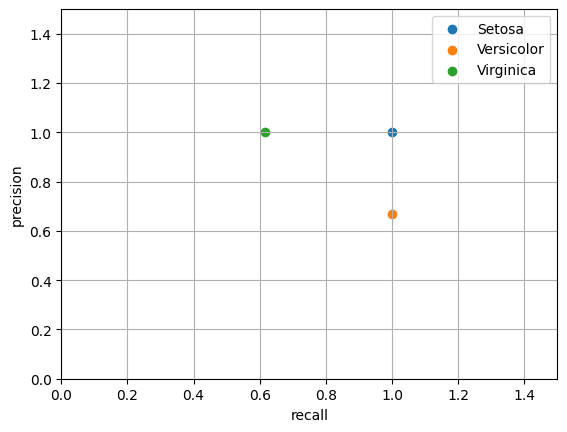

In [142]:
precision_recall_matrix = matrix(y_test,y_pred)
print(precision_recall_matrix)
plot_pc(precision_recall_matrix)

## K-Nearest Neighbour
This section uses K-Nearest Neighbour for identifying the species.

In [143]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
score = accuracy_score(y_pred,y_test)
print(y_pred)
print("Accuracy Score of K-Nearest Neighbour = "+f'{score}')

['versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor'
 'virginica' 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']
Accuracy Score of K-Nearest Neighbour = 0.8333333333333334


[[0.         1.         1.        ]
 [1.         1.         0.66666667]
 [2.         0.61538462 1.        ]]


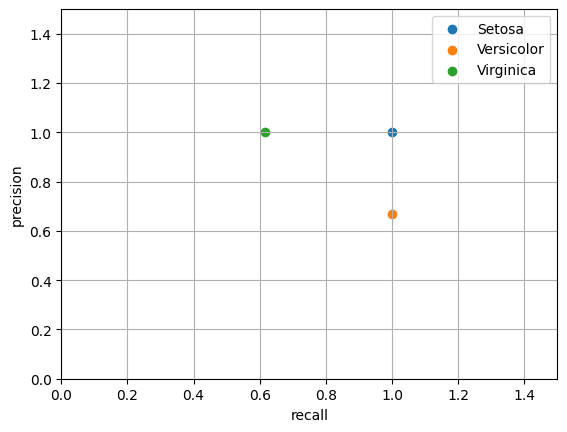

In [144]:
precision_recall_matrix = matrix(y_test,y_pred)
print(precision_recall_matrix)
plot_pc(precision_recall_matrix)

## Support Vecor Machines
This section uses Support Vecor Machines for identifying the species.

In [145]:
svm = svm.SVC(kernel="linear")
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
score = accuracy_score(y_pred,y_test)
print(y_pred)
print("Accuracy Score of Support Vecor Machines = "+f'{score}')

['versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']
Accuracy Score of Support Vecor Machines = 0.8


[[0.         1.         1.        ]
 [1.         1.         0.625     ]
 [2.         0.53846154 1.        ]]


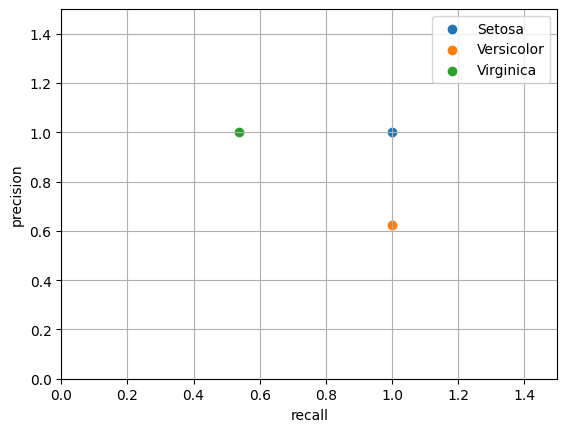

In [146]:
precision_recall_matrix = matrix(y_test,y_pred)
print(precision_recall_matrix)
plot_pc(precision_recall_matrix)